In [1]:
from matplotlib.cbook import contiguous_regions
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.core.sorting import get_compressed_ids
from pandas.io.sql import com
from scipy.optimize import curve_fit
from lab_lib import *

In [2]:
def calibrate(maxs, Es, materials):
    mpl.rcParams['font.size'] = 16
    plt.figure(figsize = (10,8), facecolor = "white")

    plt.title(r"Калибровочный график")
    plt.ylabel(r"$N$")
    plt.xlabel(r"$E,~МэВ$")

    x = []
    y = []

    for i in range(len(maxs)):
        E = [j[0] for j in Es[i]]
        maxx = [j[0] for j in maxs[i]]
        x += E
        y += maxx

        plt.errorbar(E, maxx, fmt='+', markersize=20, label = 'Экспериментальные значения для ' + materials[i])

    k_b = mnk(x, y)

    x_lin = np.linspace(min(x), max(x), 1000)
    plt.plot(x_lin, [i * k_b[0][0] + k_b[1][0] for i in x_lin], "b", label = "Аппроксимация")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12)

    plt.savefig("{}".format("img/calibration.png"))
    plt.show()

    return k_b

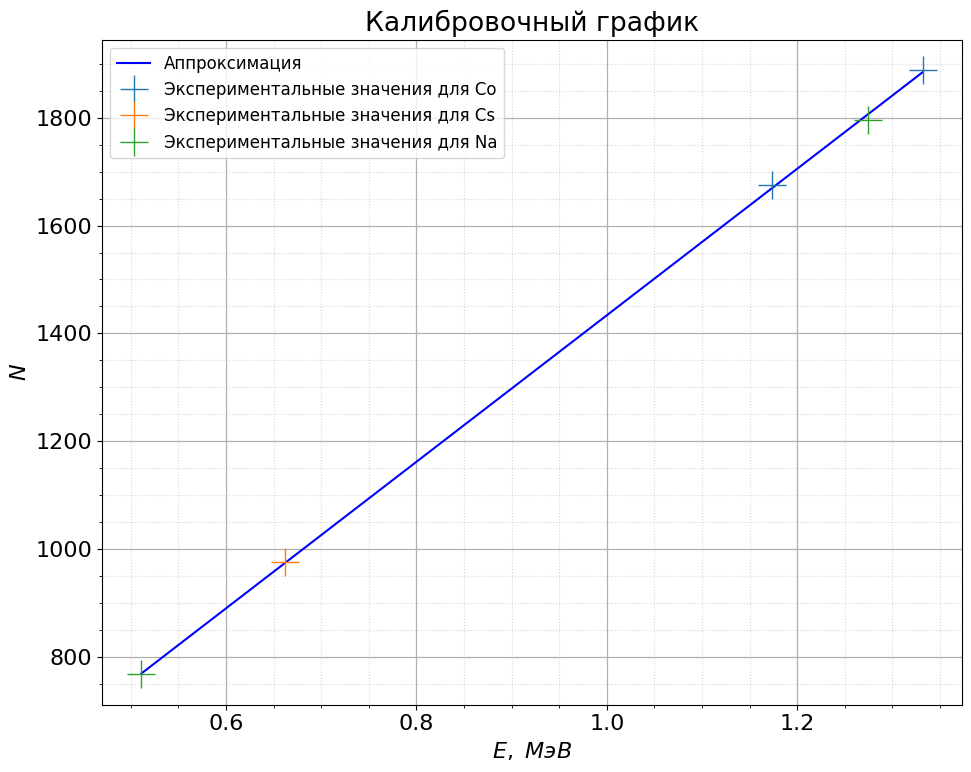

k: $1360 \pm 10$
b: $74 \pm 10$


In [3]:
"""
6. Co, Cs, Na
"""

co_maximums = [(1889, 1), (1675, 1)]
co_E = [(1.332, 0), (1.173, 0)]
co_width = [(96, 1), (76, 1)]
co_compton = [(0, 0), (1373, 30)]

cs_maximums = [(975, 1)]
cs_E = [(0.6617, 0)]
cs_width = [(60, 1)]
cs_compton = [(708, 20)]

na_maximums = [(1796, 1), (767, 1)]
na_E = [(1.274, 0), (0.511, 0)]
na_width = [(128, 1), (54, 1)]
na_compton = [(1476, 40), (511, 20)]

cal_materials = ["Co", "Cs", "Na"]
maximums = [co_maximums, cs_maximums, na_maximums]
cal_widths = [co_width, cs_width, na_width]
Es = [co_E, cs_E, na_E]

k_b = calibrate(maximums, Es, cal_materials)

print("k:", texAns(k_b[0]))
print("b:", texAns(k_b[1]))

def get_E(N):
    if not isinstance(N, tuple):
        N = (N, 0)

    k = k_b[0]
    b = k_b[1]
    return ((N[0] - b[0]) / k[0], np.sqrt((N[1]/k[0])**2 + (b[1]/k[0])**2 + ((N[0] - b[0])*k[1]/k[0]**2)**2))

def get_DeltaE(DeltaN):
    if not isinstance(DeltaN, tuple):
        DeltaN = (DeltaN, 0)

    k = k_b[0]
    return ((DeltaN[0] / k[0]), np.sqrt((DeltaN[1]/k[0])**2 + (DeltaN[0]*k[1]/k[0]**2)**2))

In [4]:
"""
7. Am, Eu
"""

am_maximums = [(150, 1), (99, 1)]
am_width = [(16, 1), (11, 1)]

eu_maximums = [(1582, 1), (1384, 1), (1135, 1), (650, 1), (537, 1), (401, 1), (298, 1), (236, 1), (188, 1), (169, 1), (118, 1)]
eu_width = [(91, 1), (86, 1), (72, 1), (80, 1), (41, 1), (30, 1), (20, 1), (17, 1), (15, 1), (8, 1), (16, 1)]

In [11]:
def get_R(delta_N, N):
    delta_E = get_DeltaE(delta_N)
    E = get_E(N)
    return (delta_E[0] / E[0], np.sqrt(delta_E[1] / E[0])**2 + (delta_E[0]*E[1]/E[0]**2)**2)

res_materials = ["Am", "Eu"]
res_maximums = [am_maximums, eu_maximums]
res_widths = [am_width, eu_width]

res_table = [["Источник", r"$N_i$", r"$\Delta N_i$", r"$E_i, кэВ$", r"$\Delta E_i, кэВ$", r"R_i"]]
for i in range(len(res_materials)):
    for j in range(len(res_maximums[i])-1, -1, -1):
        arr = [res_materials[i]]
        arr.append("$" + str(res_maximums[i][j][0]) + "$")
        arr.append("$" + str(res_widths[i][j][0]) + "$")
        arr.append(texAns(tuple(k * 1000 for k in get_E(res_maximums[i][j]))))
        arr.append(texAns(tuple(k * 1000 for k in get_DeltaE(res_widths[i][j]))))
        arr.append(texAns(get_R(res_widths[i][j], res_maximums[i][j])))
        res_table.append(arr)

texTable(res_table)

cal_table = [["Источник", r"$N_i$", r"$\Delta N_i$", r"$E_{i_{таб}}, кэВ$", r"$E_i, кэВ$", r"$\Delta E_i, кэВ$", r"R_i"]]
for i in range(len(cal_materials)):
    for j in range(len(Es[i])-1, -1, -1):
        arr = [cal_materials[i]]
        arr.append("$" + str(maximums[i][j][0]) + "$")
        arr.append("$" + str(cal_widths[i][j][0]) + "$")
        arr.append(texAns(tuple(k * 1000 for k in Es[i][j])))
        arr.append(texAns(tuple(k * 1000 for k in get_E(maximums[i][j]))))
        arr.append(texAns(tuple(k * 1000 for k in get_DeltaE(cal_widths[i][j]))))
        arr.append(texAns(get_R(cal_widths[i][j], maximums[i][j])))
        cal_table.append(arr)

texTable(cal_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|c|}
        \hline

        Источник & $N_i$ & $\Delta N_i$ & $E_i, кэВ$ & $\Delta E_i, кэВ$ & R_i\\ \hline
        Am & $99$ & $11$ & $18 \pm 8$ & $8.1 \pm 0.7$ & $0.44 \pm 0.07$\\ \hline
        Am & $150$ & $16$ & $56 \pm 8$ & $11.8 \pm 0.7$ & $0.21 \pm 0.01$\\ \hline
        Eu & $118$ & $16$ & $32 \pm 8$ & $11.8 \pm 0.7$ & $0.36 \pm 0.03$\\ \hline
        Eu & $169$ & $8$ & $70 \pm 8$ & $5.9 \pm 0.7$ & $0.084 \pm 0.011$\\ \hline
        Eu & $188$ & $15$ & $84 \pm 8$ & $11.0 \pm 0.7$ & $0.131 \pm 0.009$\\ \hline
        Eu & $236$ & $17$ & $119 \pm 8$ & $12.5 \pm 0.7$ & $0.105 \pm 0.006$\\ \hline
        Eu & $298$ & $20$ & $165 \pm 8$ & $14.7 \pm 0.7$ & $0.089 \pm 0.005$\\ \hline
        Eu & $401$ & $30$ & $241 \pm 8$ & $22.1 \pm 0.8$ & $0.092 \pm 0.003$\\ \hline
        Eu & $537$ & $41$ & $341 \pm 8$ & $30.2 \pm 0.8$ & $0.089 \pm 0.002$\\ \hline
        Eu & $650$ & $80$ & $424 \pm 8$ & $58.8 \pm 0.8$ & $0.139 

In [12]:
def get_Compton_E(E):
    mc2 = 0.511
    return (E[0] / (1 + mc2/(2*E[0])), 4*E[0]*(mc2 + E[0])/(mc2 + 2*E[0])**2 * E[1])

def get_Reverse_E(E):
    mc2 = 0.511
    return (E[0] / (1 + 2*E[0]/mc2), mc2**2 / (mc2 + 2*E[0])**2 * E[1])

In [13]:
for i in eu_maximums[::-1]:
    print(texAns(get_E(i)), ":", texAns(get_Reverse_E(get_E(i))))

$0.032 \pm 0.008$ : $0.029 \pm 0.006$
$0.070 \pm 0.008$ : $0.055 \pm 0.005$
$0.084 \pm 0.008$ : $0.063 \pm 0.004$
$0.119 \pm 0.008$ : $0.081 \pm 0.004$
$0.165 \pm 0.008$ : $0.100 \pm 0.003$
$0.241 \pm 0.008$ : $0.124 \pm 0.002$
$0.341 \pm 0.008$ : $0.146 \pm 0.001$
$0.424 \pm 0.008$ : $0.1594 \pm 0.0011$
$0.780 \pm 0.009$ : $0.1925 \pm 0.0006$
$0.964 \pm 0.010$ : $0.2020 \pm 0.0004$
$1.109 \pm 0.011$ : $0.2077 \pm 0.0004$




\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        Источник & $E_{c_{эксп}}$ & $E_{c_{теор}}$\\ \hline
        Co & $-0.054 \pm 0.008$ & $1.11762$\\ \hline
        Co & $0.96 \pm 0.02$ & $0.963198$\\ \hline
        Cs & $0.47 \pm 0.02$ & $0.477373$\\ \hline
        Na & $1.03 \pm 0.03$ & $1.06118$\\ \hline
        Na & $0.32 \pm 0.02$ & $0.340667$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



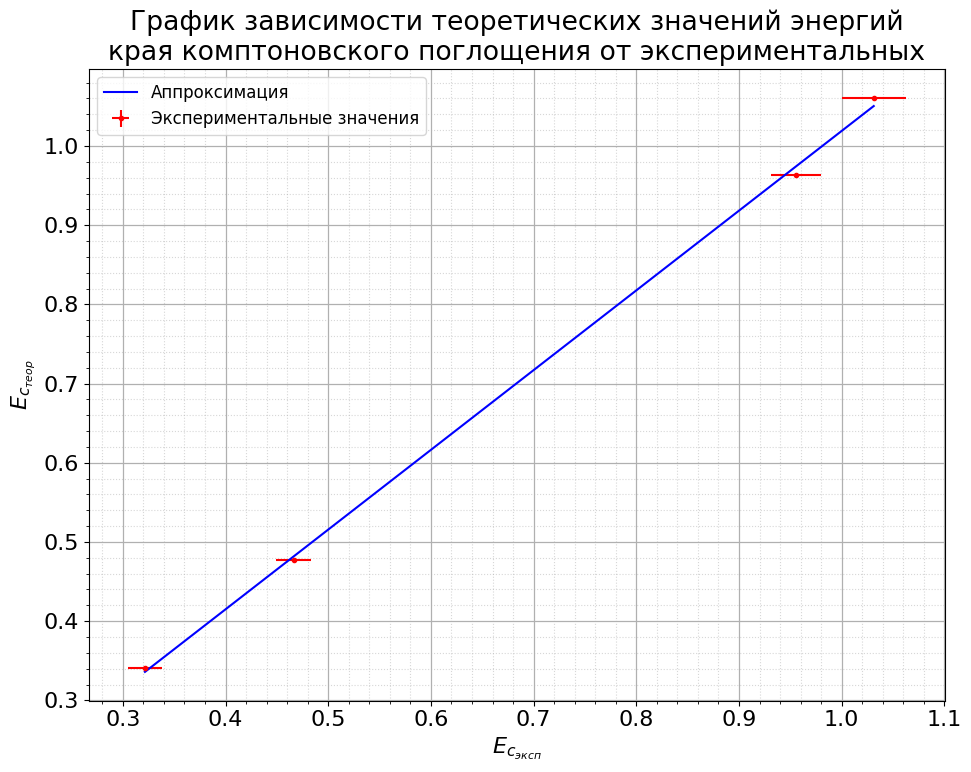

In [21]:
compton_exp = [co_compton, cs_compton, na_compton]
compton_theor = []
for i in Es:
    compton_theor.append([get_Compton_E(j) for j in i])

compton_table = [["Источник", r"$E_{c_{эксп}}$", r"$E_{c_{теор}}$"]]
for i in range(len(compton_exp)):
    for j in range(len(compton_exp[i])):
        compton_table.append([cal_materials[i], texAns(get_E(compton_exp[i][j])), texAns(compton_theor[i][j])])

texTable(compton_table)

def compton_plot():
    x = []
    dx = []
    y = []
    dy = []
    for i in range(len(compton_exp)):
        for j in range(len(compton_exp[i])):
            if i == 0 and j == 0:
                continue
            exp_ = get_E(compton_exp[i][j])
            x.append(exp_[0])
            dx.append(exp_[1])
            theor_ = compton_theor[i][j]
            y.append(theor_[0])
            dy.append(theor_[1])

    make_mnk("img/compton.png", "График зависимости теоретических значений энергий\nкрая комптоновского поглощения от экспериментальных", r"$E_{c_{эксп}}$", r"$E_{c_{теор}}$", x=x, y=y, dx=dx, dy=dy)

compton_plot()

[(96, 1), (76, 1), (60, 1), (128, 1), (54, 1), (17, 1), (41, 1)]


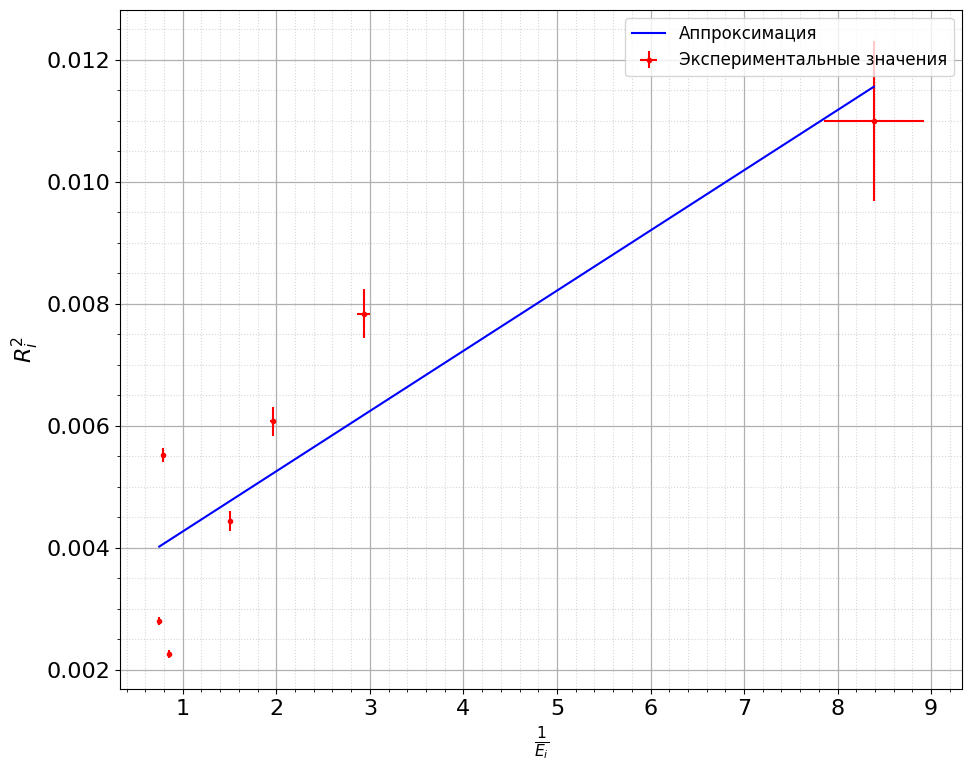

In [22]:
def check_R():
    maximums = co_maximums + cs_maximums + na_maximums + [eu_maximums[-4]] + [eu_maximums[-7]]
    widths = co_width + cs_width + na_width + [eu_width[-4]] + [eu_width[-7]]

    print(widths)

    x = []
    dx = []
    y = []
    dy = []
    for i in range(len(widths)):
        R = get_R(widths[i], maximums[i])
        y.append(R[0]**2)
        dy.append(2*R[0]*R[1])

        E_ = get_E(maximums[i])
        x.append(1/E_[0])
        dx.append(E_[1]/E_[0]**2)

    make_mnk("img/plot_r.png", "", r"$\frac{1}{E_i}$", r"$R^2_i$", x=x, y=y, dx=dx, dy=dy)

check_R()

$0.22 \pm 0.02$
$0.18 \pm 0.02$
$0.17 \pm 0.02$
$0.084 \pm 0.008$
$0.165 \pm 0.008$


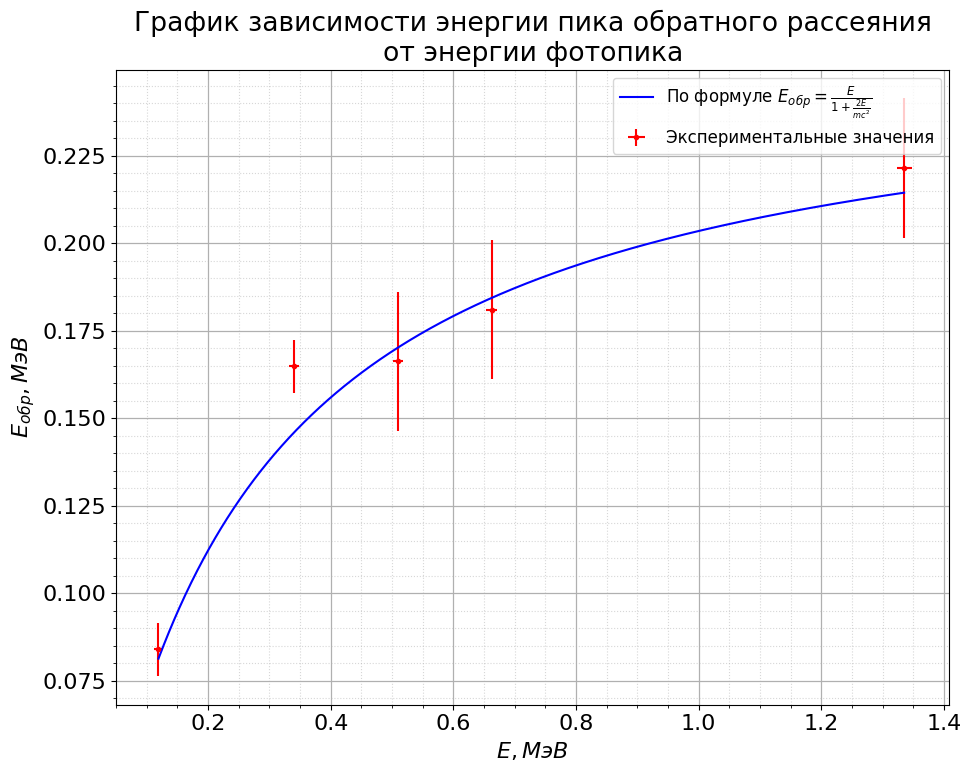



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        Источник & $E, МэВ$ & $E_{обр}, МэВ$\\ \hline
        Co & $1.178 \pm 0.011$ & $0.2099 \pm 0.0004$\\ \hline
        Co & $1.335 \pm 0.012$ & $0.2145 \pm 0.0003$\\ \hline
        Cs & $0.663 \pm 0.009$ & $0.1844 \pm 0.0007$\\ \hline
        Na & $0.510 \pm 0.008$ & $0.1702 \pm 0.0009$\\ \hline
        Na & $1.267 \pm 0.012$ & $0.2126 \pm 0.0003$\\ \hline
        Am & $0.056 \pm 0.008$ & $0.046 \pm 0.005$\\ \hline
        Eu & $0.341 \pm 0.008$ & $0.146 \pm 0.001$\\ \hline
        Eu & $0.119 \pm 0.008$ & $0.081 \pm 0.004$\\ \hline
        Eu & $0.032 \pm 0.008$ & $0.029 \pm 0.006$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [44]:
def reverse_peaks():
    true_maximums = [co_maximums[-2]] + cs_maximums + [na_maximums[-1]] + [eu_maximums[-4]] + [eu_maximums[-7]]
    true_rev = [(375, 25), (320, 25), (300, 25), eu_maximums[-3], eu_maximums[-5]]

    true_E = [get_E(i) for i in true_maximums]
    true_rev = [get_E(i) for i in true_rev]

    for i in true_rev:
        print(texAns(i))

    x = [i[0] for i in true_E]
    dx = [i[1] for i in true_E]
    y = [i[0] for i in true_rev]
    dy = [i[1] for i in true_rev]

    mpl.rcParams['font.size'] = 16
    plt.figure(figsize = (10,8), facecolor = "white")

    plt.title("График зависимости энергии пика обратного рассеяния\nот энергии фотопика")
    plt.ylabel(r"$E_{обр}, МэВ$")
    plt.xlabel(r"$E, МэВ$")

    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')

    x_lin = np.linspace(min(x), max(x), 1000)
    plt.plot(x_lin, [get_Reverse_E((i, 0))[0] for i in x_lin], "b", label = r"По формуле $E_{обр} = \frac{E}{1 + \frac{2E}{mc^2}}$")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12)

    plt.savefig("{}".format("img/plot_rev.png"))
    plt.show()

reverse_peaks()

materials = cal_materials + res_materials
true_maximums = [co_maximums, cs_maximums, na_maximums, [am_maximums[-2]], [eu_maximums[-1], eu_maximums[-4], eu_maximums[-7]]]

true_E = [[get_E(j) for j in i] for i in true_maximums]
true_rev = [[get_Reverse_E(j) for j in i] for i in true_E]
rev_table = [["Источник", r"$E, МэВ$", r"$E_{обр}, МэВ$"]]
for i in range(len(true_E)):
    for j in range(len(true_E[i]) - 1, -1, -1):
        rev_table.append([materials[i], texAns(true_E[i][j]), texAns(true_rev[i][j])])
texTable(rev_table)